In [1]:
%pylab inline
import gepyto
from gepyto.structures.genes import Gene

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load a gene from Ensembl
g = Gene.factory_symbol("CKM")

# This gene has only one transcript so we will
# get the corresponding sequence.
s = g.transcripts[0].get_sequence("protein")
print s

<Sequence: ENSP00000221476>


pan_troglodytes <Sequence: ENSPTRP00000019130>


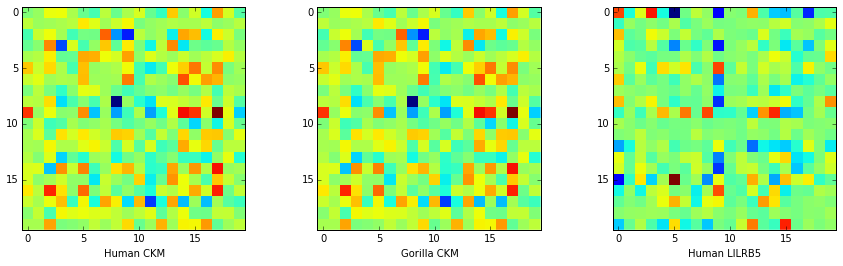

In [3]:
# Now we can compute the base-base correlation and plot it.
bbc = s.bbc(k=50)

# We can also compare this to an ortholog.
orthos = g.get_ortholog_sequences()
ortho = orthos[0]
print ortho.info["species"], ortho
ortho_bbc = ortho.bbc(k=50)

# And to anothe human gene.
g2 = Gene.factory_symbol("LILRB5")
other_bbc = g2.transcripts[0].get_sequence("protein").bbc(k=50)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].imshow(bbc.reshape(20, 20), interpolation='none')
axes[0].set_xlabel("Human CKM")

axes[1].imshow(ortho_bbc.reshape(20, 20), interpolation='none')
axes[1].set_xlabel("Gorilla CKM")

axes[2].imshow(other_bbc.reshape(20, 20), interpolation='none')
axes[2].set_xlabel("Human LILRB5")

As you can see, the BBC profiles for the orthologs are more similar than for another human gene I picked off the top of my head. This was just a short showcase of ``gepyto`` capabilities with respect to sequence analysis and easy homology or sequence queries.